In [2]:
!pip install wordcloud

   ---------------------------------------- 0.0/151.4 kB ? eta -:--:--
   ---------------- ----------------------- 61.4/151.4 kB 1.7 MB/s eta 0:00:01
   ---------------------------------------- 151.4/151.4 kB 1.5 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.3 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score, roc_auc_score, precision_score, recall_score, accuracy_score,precision_recall_curve
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
import plotly.express as px
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import string
import unicodedata
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from prettytable import PrettyTable
from nltk.corpus import wordnet
import sys
import os
import re
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('IMDB-Dataset-65k-movie-review.csv')

In [5]:
#Customize stopword as per data
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
new_stopwords = ["would","shall","could","might"]
stop_words.extend(new_stopwords)
stop_words.remove("not")
stop_words=set(stop_words)
print(stop_words)

{"didn't", 'been', 'further', "you're", "doesn't", 'wasn', 'yours', 'about', 'd', 'any', 'them', 'own', 'are', 'was', "weren't", 'until', 'itself', 'between', 'she', 'don', "mightn't", 'more', 'aren', 'hasn', 'so', 'isn', 're', 'why', 'its', 'll', 'such', "shan't", 'had', 'than', 'the', "hadn't", 'he', 'through', 'out', "needn't", 'whom', 'your', 'were', "she's", "haven't", 'shan', "couldn't", 'below', 'each', "you'll", 'of', 'both', 'into', 's', 'ma', 'myself', 'an', 'other', 'now', 'did', 'how', 'those', 'i', 'o', 'just', 'his', "wasn't", 'ourselves', 'might', 'here', 'herself', 'up', 'as', "shouldn't", 'theirs', 'you', 'her', 'it', 'if', 'after', 'what', 'by', 'yourselves', 'too', 'who', 'their', 'me', 'very', 'and', 'or', 'over', 'then', 'have', "don't", "mustn't", "wouldn't", 'be', 'some', 'didn', 'while', 'same', 'but', 'before', 'doing', "aren't", 'again', 'm', 'against', 'above', "isn't", 'has', 'him', 'mightn', 'this', "you've", 'ours', 'these', 'there', 'hers', 'only', 've', 

In [6]:
df['Reviews'][0]

'*Disclaimer: I only watched this movie as a conditional agreement. And I see films for free. I wouldn\'t be caught dead giving my hard earned money to these idiots.Well, to explain the depth of this \'film\', I could write my shortest review, ever. Don\'t see this movie. It is by far the stupidest, lamest, most lazy, and unbelievably UNFUNNY movie I have ever seen. It is a total disaster. But since my hatred for this movie, and the others like it, extends far beyond one viewing, I think I\'ll go on for a bit.I don\'t know any of the people in the movie besides Carmen Electra, Vanessa Minnillo, and Kim Kardashian, but it doesn\'t matter. They\'re all horrible, though I think that was the point. The editing is flat out horrible, and possibly blatant continuity errors make this crapfast even crappier than I thought it would be. Now I know that these films are not supposed to be serious at all, but come on, it\'s film-making 101 that if someone gets a minor facial cut, it should be there 

In [7]:
'''-----------------------------Data Cleaning and Preprocessing pipeline----------------------------------'''

#Removing special character
def remove_special_character(content):
    return re.sub('\W+',' ', content )#re.sub('\[[^&@#!]]*\]', '', content)

# Removing URL's
def remove_url(content):
    return re.sub(r'http\S+', '', content)

#Removing the stopwords from text
def remove_stopwords(content):
    clean_data = []
    for i in content.split():
        if i.strip().lower() not in stop_words and i.strip().lower().isalpha():
            clean_data.append(i.strip().lower())
    return " ".join(clean_data)

# Expansion of english contractions
def contraction_expansion(content):
    content = re.sub(r"won\'t", "would not", content)
    content = re.sub(r"can\'t", "can not", content)
    content = re.sub(r"don\'t", "do not", content)
    content = re.sub(r"shouldn\'t", "should not", content)
    content = re.sub(r"needn\'t", "need not", content)
    content = re.sub(r"hasn\'t", "has not", content)
    content = re.sub(r"haven\'t", "have not", content)
    content = re.sub(r"weren\'t", "were not", content)
    content = re.sub(r"mightn\'t", "might not", content)
    content = re.sub(r"didn\'t", "did not", content)
    content = re.sub(r"n\'t", " not", content)
    '''content = re.sub(r"\'re", " are", content)
    content = re.sub(r"\'s", " is", content)
    content = re.sub(r"\'d", " would", content)
    content = re.sub(r"\'ll", " will", content)
    content = re.sub(r"\'t", " not", content)
    content = re.sub(r"\'ve", " have", content)
    content = re.sub(r"\'m", " am", content)'''
    return content

#Data preprocessing
def data_cleaning(content):
    content = contraction_expansion(content)
    content = remove_special_character(content)
    content = remove_url(content)
    content = remove_stopwords(content)    
    return content

In [8]:
%%time
pd.options.display.max_colwidth = 1000
#Data cleaning
df['Reviews_clean']=df['Reviews'].apply(data_cleaning)

CPU times: total: 29.1 s
Wall time: 49.4 s


In [9]:
# df['Reviews_clean'][0]

In [10]:
df['Ratings']

0          1.0
1          1.0
2          1.0
3          1.0
4          1.0
          ... 
149995    10.0
149996    10.0
149997    10.0
149998    10.0
149999    10.0
Name: Ratings, Length: 150000, dtype: float64

In [11]:
#Mapping rating data to Binary label 1 (+ve) if rating >=7 and 0 (-ve) if rating <=4 and 2 (neutral) if rating = 5 or 6
df['Label'] = df['Ratings'].apply(lambda x: '1' if x >= 7 else ('0' if x<=4 else '2'))
#Removing 
df=df[df.Label<'2']
# df.to_csv("Updated_data.csv")

In [12]:
data=df[['Reviews_clean','Reviews','Ratings','Label']]

print(data['Label'].value_counts())

Label
0    60000
1    60000
Name: count, dtype: int64


In [13]:
class LemmaTokenizer:
    def __init__(self):
        self.lemmatizer = WordNetLemmatizer()
    def __call__(self, text):
        return [self.lemmatizer.lemmatize(word) for word in word_tokenize(text)]

In [14]:
train, test = train_test_split(data,test_size=.3,random_state=42, shuffle=True)

In [15]:
print("train_shape: ", train.shape)
print("test_shape: ", test.shape)

train_shape:  (84000, 4)
test_shape:  (36000, 4)


In [16]:
train = train[['Reviews_clean', 'Label']]
test = test[['Reviews_clean', 'Label']]

y_train = train['Label']
y_test = test['Label']

In [18]:
tfidf_vectorizer = TfidfVectorizer(max_features=1000, tokenizer=LemmaTokenizer())  # Note the use of LemmaTokenizer()
print(tfidf_vectorizer)

TfidfVectorizer(max_features=1000,
                tokenizer=<__main__.LemmaTokenizer object at 0x0000024F18B62450>)


In [19]:
%%time
# tfidf_vectorizer = TfidfVectorizer(max_features=10000, tokenizer=LemmaTokenizer())  # Note the use of LemmaTokenizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(train['Reviews_clean'])
X_test_tfidf = tfidf_vectorizer.transform(test['Reviews_clean'])

CPU times: total: 2min 5s
Wall time: 2min 56s


In [50]:
from sklearn.model_selection import GridSearchCV

classifier = LogisticRegression()

# Define a grid of hyperparameters to search
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'max_features': [5000, 10000, 20000]  # Maximum number of features in TF-IDF
}

best_classifier = LogisticRegression()
best_classifier.fit(X_train_tfidf, y_train)

predictions = best_classifier.predict(X_test_tfidf)

In [49]:
# Normal classification

# classifier.fit(X_train_tfidf, y_train)
# predictions = classifier.predict(X_test_tfidf)
# predictions

confusion metrics



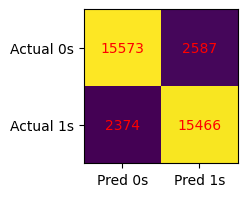

precision_score:  0.8621944444444445
              precision    recall  f1-score   support

           0       0.87      0.86      0.86     18160
           1       0.86      0.87      0.86     17840

    accuracy                           0.86     36000
   macro avg       0.86      0.86      0.86     36000
weighted avg       0.86      0.86      0.86     36000



In [51]:
y_pred = best_classifier.predict(X_test_tfidf)

def confusion_matrix_plot(y_test,y_score):
    confmatrix = confusion_matrix(y_test,y_score)
    fig, ax = plt.subplots(figsize=(2, 2))
    ax.imshow(confmatrix)
    ax.grid(False)
    ax.xaxis.set(ticks=(0, 1), ticklabels=('Pred 0s', 'Pred 1s'))
    ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
    ax.set_ylim(1.5, -0.5)
    for i in range(2):
        for j in range(2):
            ax.text(j, i, confmatrix[i, j], ha='center', va='center', color='red')
    plt.show()
    
print("confusion metrics\n")
confusion_matrix_plot(y_test,y_pred)
print("precision_score: ", precision_score(y_test, y_pred,average='micro'))
print(classification_report(y_test, y_pred))

In [52]:
import pickle

In [53]:
import joblib
# Step 4: Save the model and vectorizer to files
model_filename = "sentiment_model.joblib"
vectorizer_filename = "tfidf_vectorizer.joblib"

# Save the model
joblib.dump(best_classifier, model_filename)

# Save the vectorizer
joblib.dump(tfidf_vectorizer, vectorizer_filename)

['tfidf_vectorizer.joblib']

In [23]:
%%time
logreg = LogisticRegression()
logreg.fit(X_train_tfidf, y_train)

CPU times: total: 2.59 s
Wall time: 6.75 s


LogisticRegression()

In [24]:
# logreg.predict(X_test_tfidf)

array(['1', '1', '0', ..., '0', '0', '1'], dtype=object)

In [30]:
x = logreg.predict(X_test_tfidf)

In [31]:
y_pred = logreg.predict(X_test_tfidf)

confusion metrics



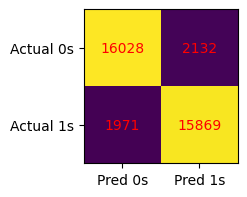

precision_score:  0.8860277777777777
              precision    recall  f1-score   support

           0       0.89      0.88      0.89     18160
           1       0.88      0.89      0.89     17840

    accuracy                           0.89     36000
   macro avg       0.89      0.89      0.89     36000
weighted avg       0.89      0.89      0.89     36000



In [32]:
def confusion_matrix_plot(y_test,y_score):
    confmatrix = confusion_matrix(y_test,y_score)
    fig, ax = plt.subplots(figsize=(2, 2))
    ax.imshow(confmatrix)
    ax.grid(False)
    ax.xaxis.set(ticks=(0, 1), ticklabels=('Pred 0s', 'Pred 1s'))
    ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
    ax.set_ylim(1.5, -0.5)
    for i in range(2):
        for j in range(2):
            ax.text(j, i, confmatrix[i, j], ha='center', va='center', color='red')
    plt.show()
    
print("confusion metrics\n")
confusion_matrix_plot(y_test,y_pred)
print("precision_score: ", precision_score(y_test, x,average='micro'))
print(classification_report(y_test, x))

In [34]:
import joblib
# Step 4: Save the model and vectorizer to files
model_filename = "sentiment_model.joblib"
vectorizer_filename = "tfidf_vectorizer.joblib"

# Save the model
joblib.dump(logreg, model_filename)

# Save the vectorizer
joblib.dump(tfidf_vectorizer, vectorizer_filename)

['tfidf_vectorizer.joblib']

In [37]:
random_text = "This movie is absolutely fantastic! I highly recommend it."

# Step 5: Preprocess the Text (if required)
# Preprocess 'random_text' in the same way you preprocessed the training data

# Step 6: TF-IDF Vectorization
random_text_tfidf = tfidf_vectorizer.transform([random_text])

# Step 7: Sentiment Prediction
sentiment_label = logreg.predict(random_text_tfidf)[0]

# Mapping the predicted label to sentiment
sentiment_map = {'0': "Negative", '1': "Positive"}
predicted_sentiment = sentiment_map[sentiment_label]

print(f"Predicted Sentiment: {predicted_sentiment}")

Predicted Sentiment: Positive


In [53]:
test['Reviews_clean'][25655:25656]

28423    fifteen years millennium bollywood still not learned clip bad elements film continues sample tried tested components rake moolah without caring tick cinema art since start decade served loads remakes sequels tevar nothing different regards audience rocks tevar tells story time telugu tamil kannada bengali fifth real life superman arjun kapoor not bear superpowers yet makes life purpose help damsel actually derogatory word miss sonakshi distress clutches ruffian manoj bajpayee making stay house without knowledge family members including father cop stupid story sounds one jump hall exasperation unfortunately improvement story narration screenplay action least humor time reaches climax climax happens almost smothered death corn buds basket not actually pop makers welcomed new year bombastic escapade amateur characters look strange even fictional milieu one gets excited arjun kapoor hot bod stylistic stunts dialogs come wreak havoc whole play obscene substandard even relish manoj 

In [25]:
# %%time
# model_1000.fit(x_train_tfidf_1000, y_train)

In [26]:
# %%time
# model_100.fit(x_train_tfidf_100, y_train)

confusion metrics



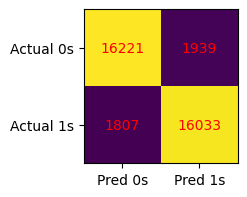

precision_score:  0.8959444444444444
              precision    recall  f1-score   support

           0       0.90      0.89      0.90     18160
           1       0.89      0.90      0.90     17840

    accuracy                           0.90     36000
   macro avg       0.90      0.90      0.90     36000
weighted avg       0.90      0.90      0.90     36000



In [95]:
def confusion_matrix_plot(y_test,y_score):
    confmatrix = confusion_matrix(y_test,y_score)
    fig, ax = plt.subplots(figsize=(2, 2))
    ax.imshow(confmatrix)
    ax.grid(False)
    ax.xaxis.set(ticks=(0, 1), ticklabels=('Pred 0s', 'Pred 1s'))
    ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
    ax.set_ylim(1.5, -0.5)
    for i in range(2):
        for j in range(2):
            ax.text(j, i, confmatrix[i, j], ha='center', va='center', color='red')
    plt.show()
    
= model_10000.predict(x_test_tfidf)
print("confusion metrics\n")
confusion_matrix_plot(y_test,x10000)
print("precision_score: ", precision_score(y_test, x10000,average='micro'))
print(classification_report(y_test, x10000))

In [98]:
# x100 = model_100.predict(x_test_tfidf__100)
# print("confusion metrics\n")
# confusion_matrix_plot(y_test,x100)
# print("precision_score: ", precision_score(y_test, x100,average='micro'))
# print(classification_report(y_test, x100))

In [99]:
# x1000 = model_1000.predict(x_test_tfidf__1000)
# print("confusion metrics\n")
# confusion_matrix_plot(y_test,x1000)
# print("precision_score: ", precision_score(y_test, x1000,average='micro'))
# print(classification_report(y_test, x1000))

In [96]:
# x10000 = model_10000.predict(x_test_tfidf)
# print("confusion metrics\n")
# confusion_matrix_plot(y_test,x10000)
# print("precision_score: ", precision_score(y_test, x10000,average='micro'))
# print(classification_report(y_test, x10000))

In [99]:
random_text = "This movie is absolutely fantastic! I highly recommend it."

# Step 5: Preprocess the Text (if required)
# Preprocess 'random_text' in the same way you preprocessed the training data

# Step 6: TF-IDF Vectorization
random_text_tfidf = tfidfvect.transform([random_text])

# Step 7: Sentiment Prediction
sentiment_label = model_10000.predict(random_text_tfidf)[0]

# Mapping the predicted label to sentiment
sentiment_map = {'0': "Negative", '1': "Positive"}
predicted_sentiment = sentiment_map[sentiment_label]

print(f"Predicted Sentiment: {predicted_sentiment}")

Predicted Sentiment: Positive


In [65]:
import joblib

model_filename = "sentiment_model.joblib"
vectorizer_filename = "tfidf_vectorizer.joblib"

# Save the model
joblib.dump(logreg, model_filename)

# Save the vectorizer
joblib.dump(tfidf_vectorizer, vectorizer_filename)

['tfidf_vectorizer.joblib']

In [30]:
import joblib

In [ ]:
# # save the model for 100 size
# joblib.dump(model_100, "Model/100_Log_mode.pkl")
# joblib.dump(model_1000, "Model/1000_Log_model.pkl")
joblib.dump(model_10000, "Model/10000_Log_model.pkl")

['Model/10000_Log_model.pkl']

In [61]:
# load the model

In [62]:
loaded_model_100 = joblib.load('Model/100_Log_mode.pkl')

In [63]:
loaded_model_1000 = joblib.load('Model/1000_Log_model.pkl')

In [10]:
import joblib

In [ ]:
loaded_model_10000 = joblib.load('Model/10000_Log_model.pkl')

# Prediction Time

In [24]:
tfidfvect_10000 = TfidfVectorizer(analyzer = "word", tokenizer = LemmaTokenizer(), ngram_range=(1,3),min_df=10,max_features=10000)

In [135]:
loaded_model_10000.predict(x)

array(['0'], dtype=object)

In [33]:
loaded_model_10000 = joblib.load('Model/10000_Log_model.pkl')

In [48]:
ana = TfidfVectorizer(analyzer="word", tokenizer=LemmaTokenizer(), ngram_range=(1,3), min_df=1, max_features=1000)
x = input()

 really write scathing review turd sandwich instead going making observations points deduced point watching movies anymore reader remember scary movie remember original comedic elements slapstick funny lines pretty forgettable comedy worth price admission well last time premise funny stop making movies please call boycott pieces monkey sh know going line pre pubescent annoying little buggers spouting crappy one liners like sparta im rick james bitch movies continue make form monetary gain considering production value movie looks like cost cents make not see movie not spend money go home rent airplane laugh ass silently judge people talking movie monday favor


In [49]:
data = ana.fit_transform([x]).toarray()

In [50]:
data.shape

(1, 279)

In [51]:
loaded_model_10000.predict(data)

ValueError: X has 279 features, but LogisticRegression is expecting 1000 features as input.